# Titanic spaceship dataset analysis:
_________________
### Task:
Your task is to explore, analyze and draw valuable conclusions from the "Spaceship Titanic" dataset. 🛸🌠 You need to discover as many interesting statistics and relationships between passenger characteristics as possible. You also need to visualize everything in graphs to further illustrate their nature, and then convincingly present and justify your conclusions. 💡📊

But it doesn't stop there! If you get even more curious and feel like using your analysis more broadly, a machine learning model predicting whether or not a particular passenger has been transported to another dimension would be welcome. 🤖🌌
_____________
### Dataset's features description:
- **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
- **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- **Destination** - The planet the passenger will be debarking to.
- **Age** - The age of the passenger.
- **VIP** - Whether the passenger has paid for special VIP service during the voyage.
- **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- **Name** - The first and last names of the passenger.
- **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you want to predict if you decide to create a machine learning model (see task description).
-----------------------------------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_spaceship_df = pd.read_csv("../../dane.csv")
titanic_spaceship_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
titanic_spaceship_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
titanic_spaceship_df.isnull().sum(axis=0)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

### Let's clean up the dataset:
____________

In [5]:
titanic_cleaned_df = titanic_spaceship_df.copy()

In [6]:
titanic_cleaned_df.fillna({"HomePlanet": "Unknown", "Destination": "Unknown", "Name": "-", }, inplace=True)

In [7]:
numericalFeatures = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
for i in numericalFeatures:
    titanic_cleaned_df[i].fillna(titanic_spaceship_df[i].median(), inplace=True)

In [8]:
titanic_cleaned_df.dropna(inplace=True)

In [9]:
titanic_cleaned_df.isnull().sum(axis=0)

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

_____________________
# Analysis of planets/routes:
_____________________________

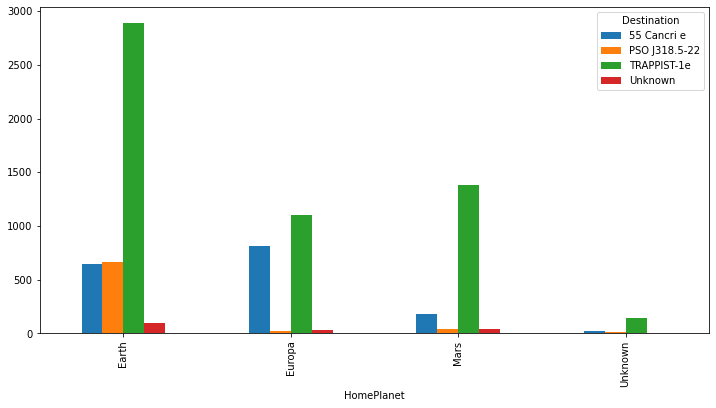

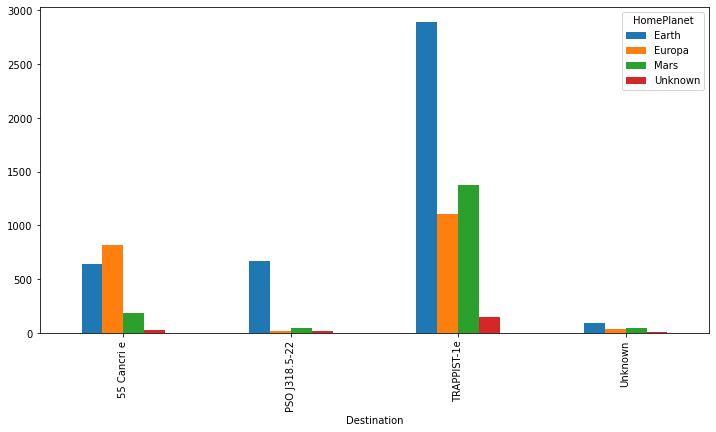

In [10]:
pd.crosstab(titanic_cleaned_df.HomePlanet, titanic_cleaned_df.Destination).plot.bar(figsize = (12, 6));
pd.crosstab(titanic_cleaned_df.Destination, titanic_cleaned_df.HomePlanet).plot.bar(figsize = (12, 6));

In [11]:
frequentRoutes = pd.crosstab(titanic_cleaned_df.HomePlanet, titanic_cleaned_df.Destination)

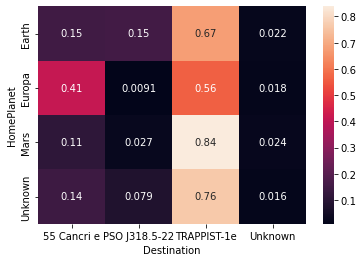

In [12]:
frequentRoutesNormalized = frequentRoutes.copy()
frequentRoutesNormalized = frequentRoutesNormalized.div(frequentRoutesNormalized.sum(axis=1), axis=0)
sns.heatmap(frequentRoutesNormalized, annot=True);

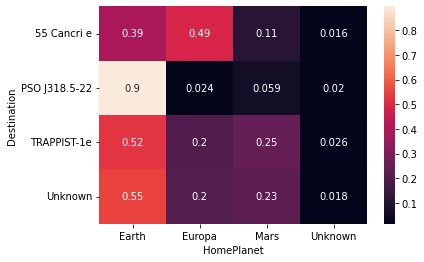

In [13]:
frequentRoutesNormalized2 = frequentRoutes.T.copy()
frequentRoutesNormalized2 = frequentRoutesNormalized2.div(frequentRoutesNormalized2.sum(axis=1), axis=0)
sns.heatmap(frequentRoutesNormalized2, annot=True);

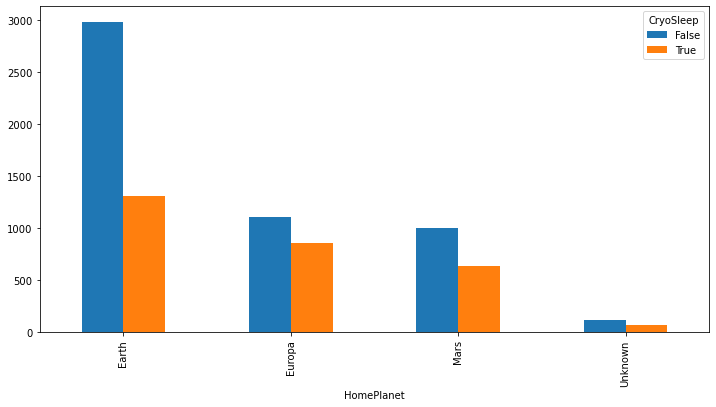

In [14]:
pd.crosstab(titanic_cleaned_df.HomePlanet, titanic_cleaned_df.CryoSleep).plot.bar(figsize = (12, 6));

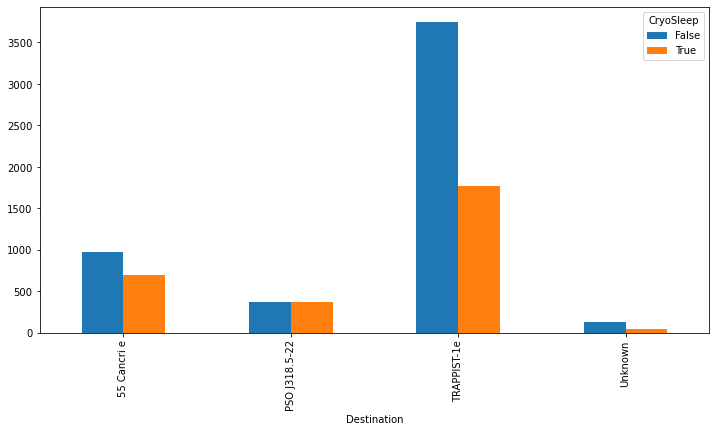

In [15]:
pd.crosstab(titanic_cleaned_df.Destination, titanic_cleaned_df.CryoSleep).plot.bar(figsize = (12, 6));

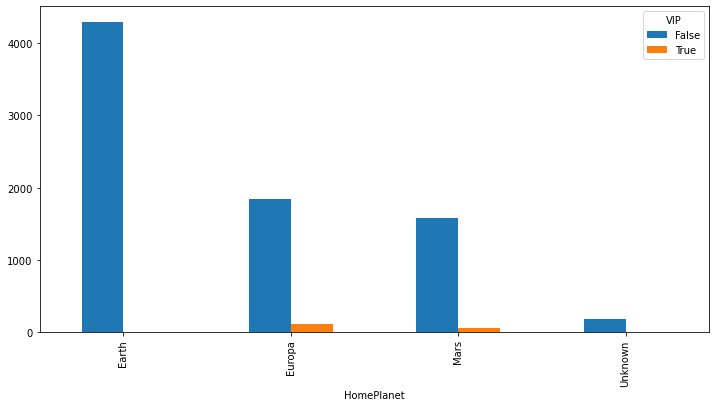

In [16]:
pd.crosstab(titanic_cleaned_df.HomePlanet, titanic_cleaned_df.VIP).plot.bar(figsize = (12, 6));

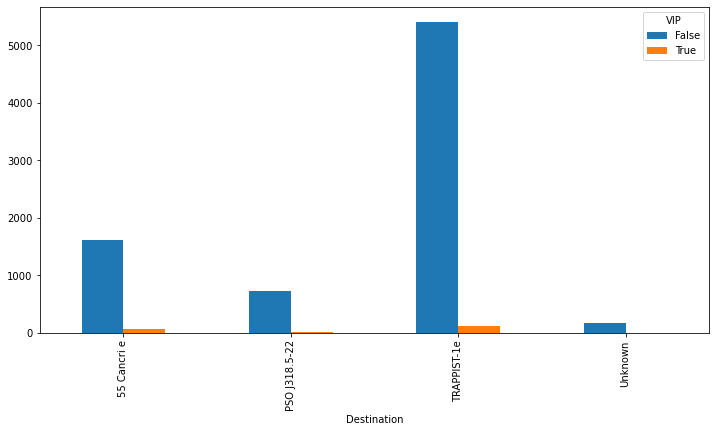

In [17]:
pd.crosstab(titanic_cleaned_df.Destination, titanic_cleaned_df.VIP).plot.bar(figsize = (12, 6));

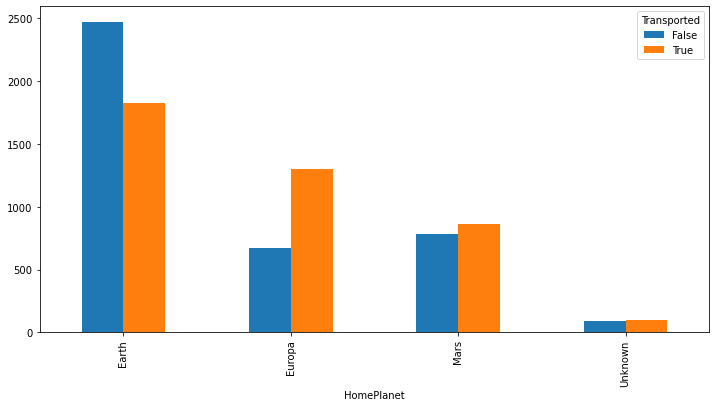

In [18]:
pd.crosstab(titanic_cleaned_df.HomePlanet, titanic_cleaned_df.Transported).plot.bar(figsize = (12, 6));

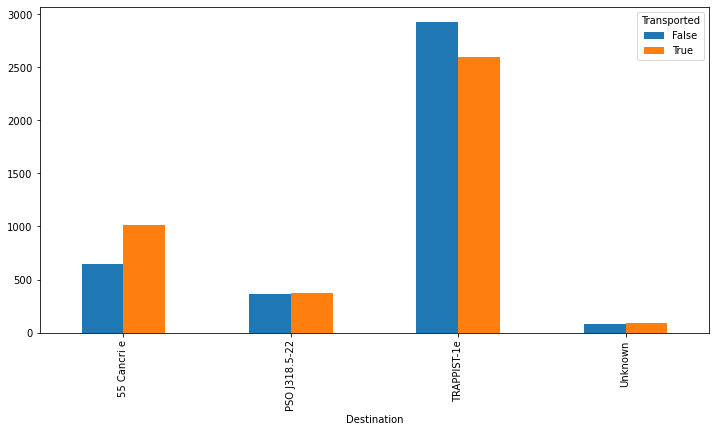

In [19]:
pd.crosstab(titanic_cleaned_df.Destination, titanic_cleaned_df.Transported).plot.bar(figsize = (12, 6));

In [20]:
titanic_cleaned_df[(titanic_cleaned_df.HomePlanet == "Unknown") & (titanic_cleaned_df.Destination == "Unknown")]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
347,0382_01,Unknown,False,G/64/P,Unknown,23.0,False,348.0,0.0,0.0,4.0,368.0,Blanie Floydendley,False
5687,6031_01,Unknown,False,F/1146/S,Unknown,52.0,False,0.0,645.0,0.0,0.0,395.0,Bobara Alshipson,True
6629,6992_01,Unknown,False,G/1131/P,Unknown,12.0,False,0.0,0.0,0.0,0.0,0.0,Walles Bakerrison,False


_______________
## Ananlysis of services/luxury amenities:
______________

In [21]:
titanic_cleaned_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8094.000000,8094.000000,8094.000000,8094.000000,8094.000000,8094.000000
mean,28.827403,216.795404,448.459353,173.302323,302.081542,299.841488
std,14.321199,628.943720,1599.674771,612.680568,1119.444194,1137.229428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.750000,60.750000,24.000000,54.000000,41.750000
max,79.000000,9920.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [23]:
pd.crosstab(titanic_cleaned_df.VIP, titanic_cleaned_df.CryoSleep)

CryoSleep,False,True
VIP,,
False,5046,2858
True,169,21


In [24]:
titanic_cleaned_df[titanic_cleaned_df.VIP == True].Transported.value_counts()

False    116
True      74
Name: Transported, dtype: int64

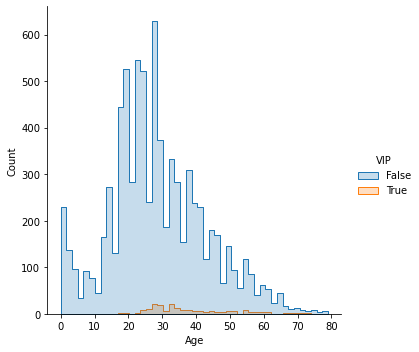

In [25]:
sns.displot(titanic_cleaned_df, x="Age", hue="VIP", element="step");

In [26]:
numericalFeatures.append("CryoSleep")

In [27]:
normalized_df = titanic_cleaned_df[numericalFeatures].copy()
for i in numericalFeatures:
    if(i == "CryoSleep"): continue
    minV = normalized_df[i].min()
    maxV = normalized_df[i].max()
    normalized_df[i] = (titanic_cleaned_df[i] - minV)/ (maxV - minV)
normalized_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8094.000000,8094.000000,8094.000000,8094.000000,8094.000000,8094.000000
mean,0.364904,0.021854,0.015042,0.007377,0.013481,0.012425
std,0.181281,0.063402,0.053657,0.026080,0.049957,0.047123
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253165,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.468354,0.004209,0.002038,0.001022,0.002410,0.001730
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
numericalFeatures

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'CryoSleep']

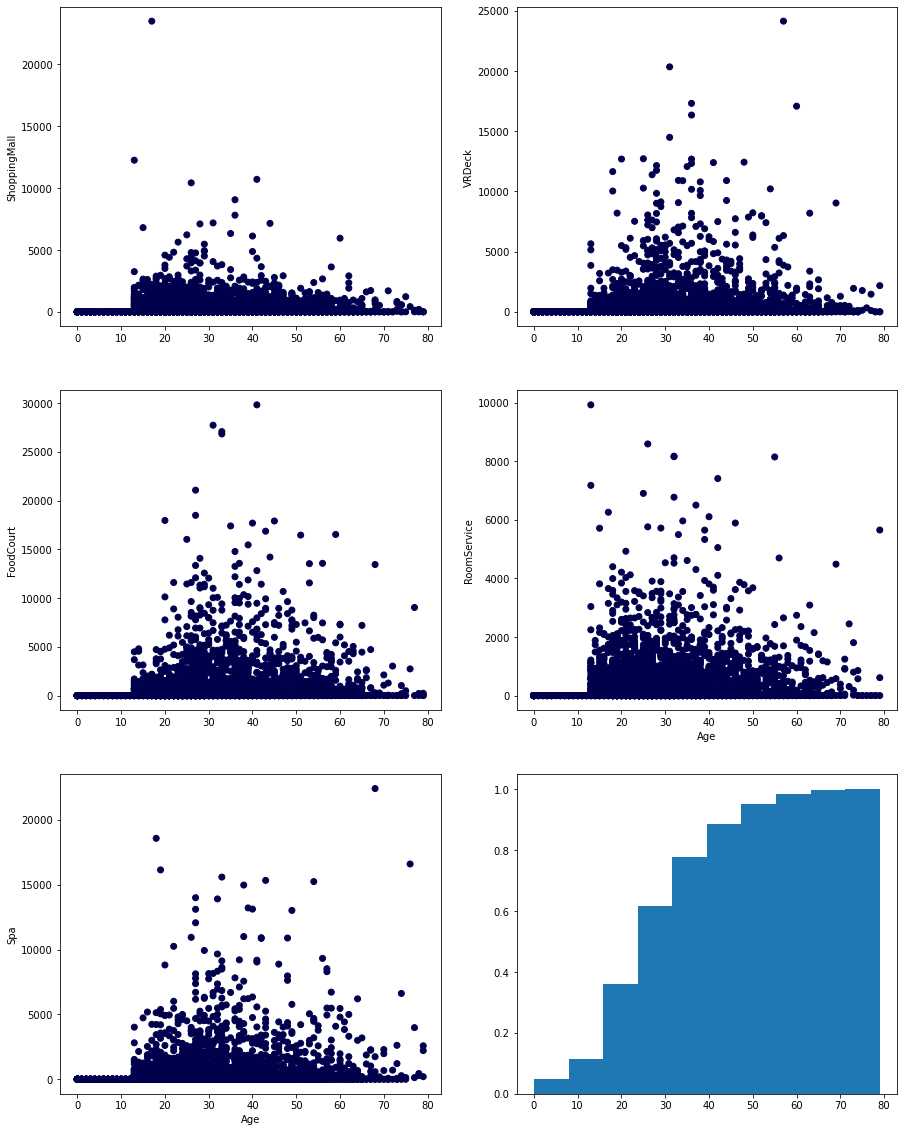

In [48]:
dfForNumerical = titanic_cleaned_df[titanic_cleaned_df.CryoSleep == False]

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15,20))
scatter1 = ax1.scatter(data = dfForNumerical, x = "Age", y="ShoppingMall",c='CryoSleep', cmap='seismic');
ax1.set_ylabel("ShoppingMall")

scatter2 = ax2.scatter(data = dfForNumerical, x = "Age", y="VRDeck",c='CryoSleep', cmap='seismic');
ax2.set_ylabel("VRDeck")

scatter3 = ax3.scatter(data = dfForNumerical, x = "Age", y="FoodCourt",c='CryoSleep', cmap='seismic');
ax3.set_ylabel("FoodCourt")

scatter4 = ax4.scatter(data = dfForNumerical, x = "Age", y="RoomService",c='CryoSleep', cmap='seismic');
ax4.set_xlabel("Age")
ax4.set_ylabel("RoomService")

scatter5 = ax5.scatter(data = dfForNumerical, x = "Age", y="Spa",c='CryoSleep', cmap='seismic');
ax5.set_xlabel("Age")
ax5.set_ylabel("Spa")

hist6 = ax6.hist(dfForNumerical.Age, bins=10, density=True, cumulative=True);
sorted_age = np.sort(dfForNumerical['Age'])
y = np.arange(1, len(sorted_age) + 1) / len(sorted_age)

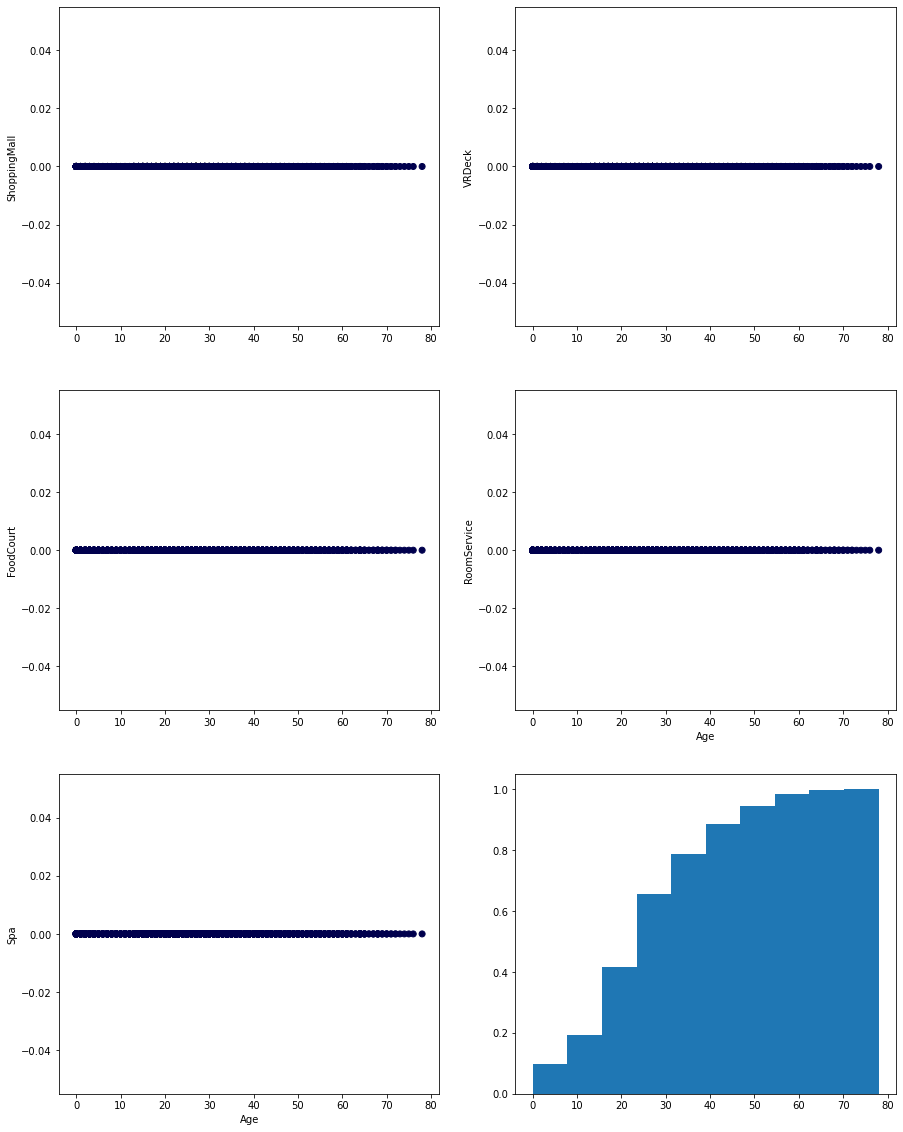

In [54]:
dfForNumerical = titanic_cleaned_df[titanic_cleaned_df.CryoSleep == True]

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15,20))
scatter1 = ax1.scatter(data = dfForNumerical, x = "Age", y="ShoppingMall",c='CryoSleep', cmap='seismic');
ax1.set_ylabel("ShoppingMall")

scatter2 = ax2.scatter(data = dfForNumerical, x = "Age", y="VRDeck",c='CryoSleep', cmap='seismic');
ax2.set_ylabel("VRDeck")

scatter3 = ax3.scatter(data = dfForNumerical, x = "Age", y="FoodCourt",c='CryoSleep', cmap='seismic');
ax3.set_ylabel("FoodCourt")

scatter4 = ax4.scatter(data = dfForNumerical, x = "Age", y="RoomService",c='CryoSleep', cmap='seismic');
ax4.set_xlabel("Age")
ax4.set_ylabel("RoomService")

scatter5 = ax5.scatter(data = dfForNumerical, x = "Age", y="Spa",c='CryoSleep', cmap='seismic');
ax5.set_xlabel("Age")
ax5.set_ylabel("Spa")

hist6 = ax6.hist(dfForNumerical.Age, bins=10, density=True, cumulative=True);
sorted_age = np.sort(dfForNumerical['Age'])
y = np.arange(1, len(sorted_age) + 1) / len(sorted_age)

In [32]:
for i in numericalFeatures:
    if(i == "Age"): continue
    print(titanic_spaceship_df[(titanic_spaceship_df.CryoSleep == True) & (titanic_spaceship_df[i] > 0)].shape)

(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(3037, 14)


In [33]:
titanic_cleaned_df[titanic_cleaned_df.CryoSleep == False].shape[0]/titanic_cleaned_df[titanic_cleaned_df.CryoSleep == True].shape[0]

1.811392844737756

In [34]:
if("CryoSleep" in numericalFeatures):
    numericalFeatures.remove("CryoSleep")
# if("Age" in numericalFeatures):
#     numericalFeatures.remove("Age")

In [35]:
normalized_df.reset_index(drop=True, inplace=True)
normalized_df[numericalFeatures]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.303797,0.010988,0.000302,0.001064,0.024500,0.001823
2,0.734177,0.004335,0.119948,0.000000,0.299670,0.002030
3,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997
4,0.202532,0.030544,0.002348,0.006428,0.025214,0.000083
...,...,...,...,...,...,...
8089,0.518987,0.000000,0.228726,0.000000,0.073322,0.003066
8090,0.227848,0.000000,0.000000,0.000000,0.000000,0.000000
8091,0.329114,0.000000,0.000000,0.079687,0.000045,0.000000
8092,0.405063,0.000000,0.035186,0.000000,0.015753,0.134049


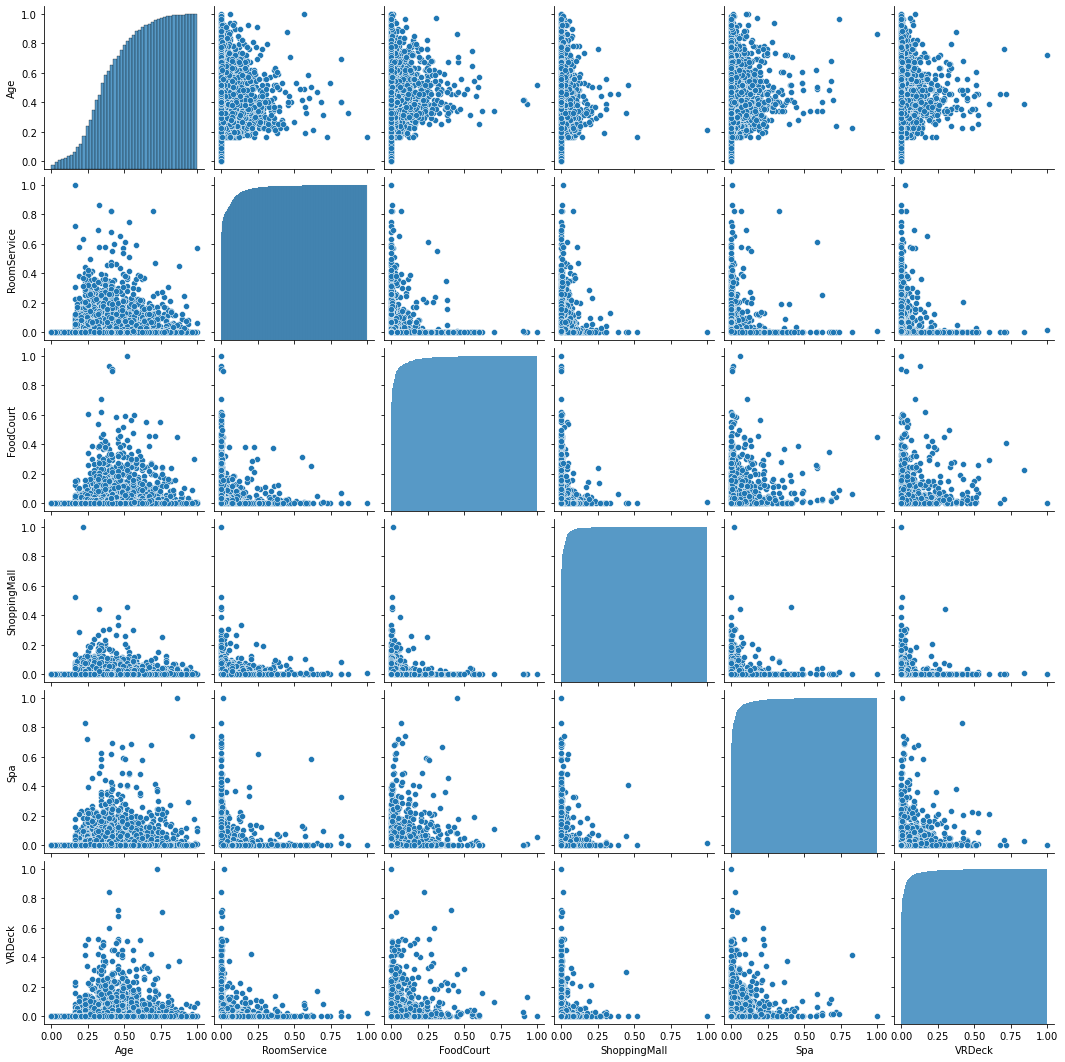

In [36]:
sns.pairplot(
    normalized_df[numericalFeatures], diag_kws=dict(cumulative=True)
);

In [45]:
for i in numericalFeatures:
    print(f"Medians for feature {i} depending if Transported:")
    print("if Transported == True")
    print(titanic_cleaned_df[titanic_cleaned_df["Transported"] == True][i].median())
    print("if Transported == False")
    print(titanic_cleaned_df[titanic_cleaned_df["Transported"] == False][i].median())
    print("\n")

Medians for feature Age depending if Transported:
if Transported == True
27.0
if Transported == False
27.0


Medians for feature RoomService depending if Transported:
if Transported == True
0.0
if Transported == False
1.0


Medians for feature FoodCourt depending if Transported:
if Transported == True
0.0
if Transported == False
0.0


Medians for feature ShoppingMall depending if Transported:
if Transported == True
0.0
if Transported == False
0.0


Medians for feature Spa depending if Transported:
if Transported == True
0.0
if Transported == False
3.0


Medians for feature VRDeck depending if Transported:
if Transported == True
0.0
if Transported == False
1.0




____________________________________
## Ananlysis of "Transported" field 
___________________________

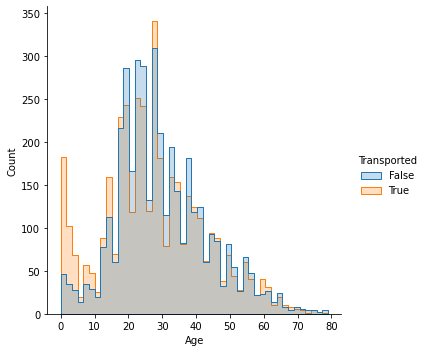

In [56]:
sns.displot(titanic_cleaned_df, x="Age", hue="Transported", element="step");

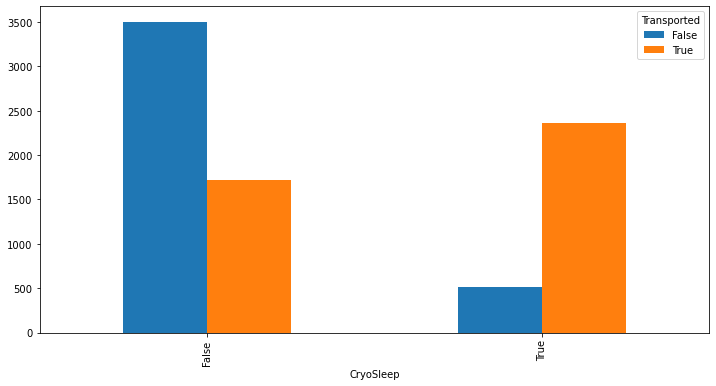

In [63]:
pd.crosstab(titanic_cleaned_df.CryoSleep, titanic_cleaned_df.Transported).plot.bar(figsize = (12, 6));

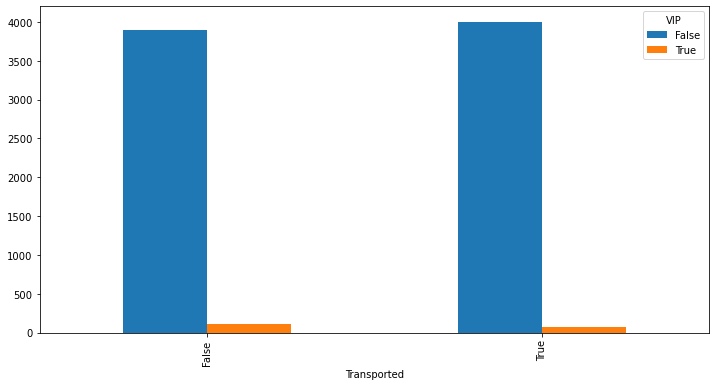

In [64]:
pd.crosstab(titanic_cleaned_df.Transported, titanic_cleaned_df.VIP).plot.bar(figsize = (12, 6));

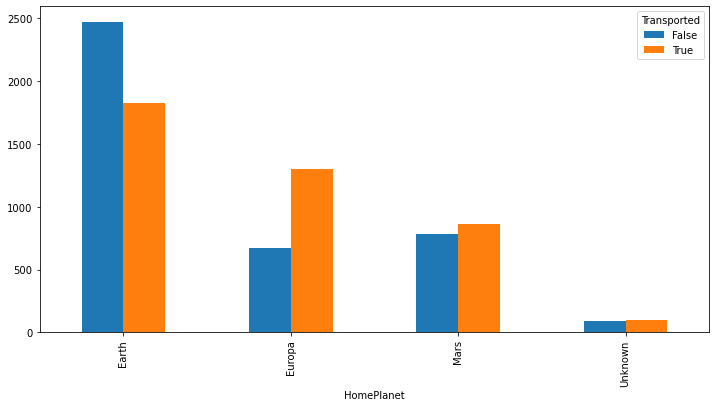

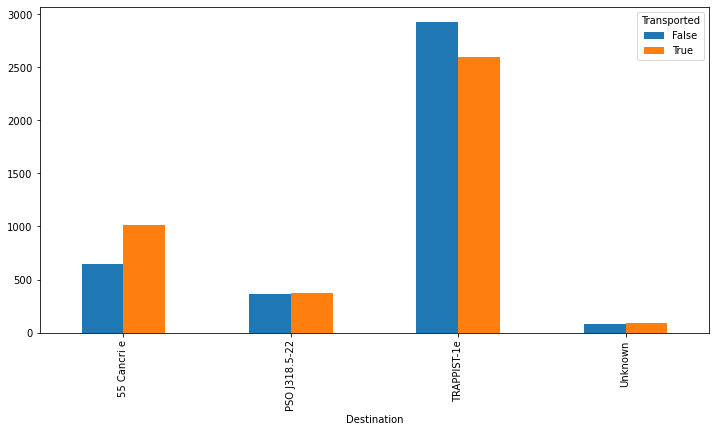

In [65]:
pd.crosstab(titanic_cleaned_df.HomePlanet, titanic_cleaned_df.Transported).plot.bar(figsize = (12, 6));
pd.crosstab(titanic_cleaned_df.Destination, titanic_cleaned_df.Transported).plot.bar(figsize = (12, 6));

In [67]:
for i in numericalFeatures:
    print(f"Medians for feature {i} depending if Transported:")
    print("if Transported == True")
    print(titanic_cleaned_df[titanic_cleaned_df["Transported"] == True][i].median())
    print("if Transported == False")
    print(titanic_cleaned_df[titanic_cleaned_df["Transported"] == False][i].median())
    print("")

Medians for feature Age depending if Transported:
if Transported == True
27.0
if Transported == False
27.0

Medians for feature RoomService depending if Transported:
if Transported == True
0.0
if Transported == False
1.0

Medians for feature FoodCourt depending if Transported:
if Transported == True
0.0
if Transported == False
0.0

Medians for feature ShoppingMall depending if Transported:
if Transported == True
0.0
if Transported == False
0.0

Medians for feature Spa depending if Transported:
if Transported == True
0.0
if Transported == False
3.0

Medians for feature VRDeck depending if Transported:
if Transported == True
0.0
if Transported == False
1.0



______________
## Prediction of "Transported" field:
________________

In [96]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [86]:
X = titanic_cleaned_df.drop("Transported", axis=1)
X.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [87]:
Y = titanic_cleaned_df.Transported.astype(int)
Y.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int32

In [88]:
for i in ["CryoSleep", "VIP"]:
    X[i] = X[i].astype(int)

In [89]:
X["Deck"] = X.Cabin.apply(lambda x: x.split("/")[0])
X["Num"] = X.Cabin.apply(lambda x: x.split("/")[1])
X["Side"] = X.Cabin.apply(lambda x: x.split("/")[2])
X.drop(columns=["Cabin", "Name", "PassengerId"], inplace=True)
X.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,F,1,S


In [91]:
featuresToEncode = ["HomePlanet", "Destination", "Deck", "Num", "Side"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",  one_hot, featuresToEncode)], remainder="passthrough")

In [94]:
transformed_X = transformer.fit_transform(X).toarray()

array([[0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.500e+01, 5.490e+02,
        4.400e+01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 6.715e+03,
        4.900e+01],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.872e+03, 1.000e+00,
        0.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 3.530e+02,
        3.235e+03],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.200e+01]])

In [95]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,...,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8089,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0
8090,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
8091,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0
8092,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0


In [98]:
np.random.seed(43)
X_train, X_test, Y_train, Y_test = train_test_split(transformed_X, Y, test_size=0.3)
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [99]:
model.score(X_test, Y_test)

0.8097982708933718

In [102]:
for i in range(60, 250, 10):
    np.random.seed(43)
    X_train, X_test, Y_train, Y_test = train_test_split(transformed_X, Y, test_size=0.3)
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train, Y_train)
    print(model.score(X_test, Y_test))

0.8089748867846851
0.8093865788390284
0.8093865788390284
0.8085631947303417
0.8097982708933718
0.8114450391107452
0.8089748867846851
0.8102099629477151
0.8118567311650885
0.8106216550020584
0.8118567311650885
0.8130918073281186
0.8114450391107452
0.8110333470564018
0.8102099629477151
0.8122684232194318
0.8135034993824619
0.8143268834911486
0.8143268834911486
